In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = 'both'

def gsm_fidelity(data):
    '''return ground state manifold fidelity'''
    if round(data['J']/data['B'], 2) > 1:
        return np.sum(data['eigoccs'][:2])
    else:
        return data['eigoccs'][0] 

# Loading and checking data

## Cooling

In [2]:
data_dir = "../data/TFIM/logsweep/WF/cooling/"

files = sorted(os.listdir(data_dir))

cooling_data = []
for file in files:
    if not file.endswith('.json'): continue
    cooling_data.append(json.load(open(data_dir+file, 'r')))

## Reheating

In [3]:
data_dir = "../data/TFIM/logsweep/WF/reheating/"

files = sorted(os.listdir(data_dir))

reheating_data = []
for file in files:
    if not file.endswith('.json'): continue
    reheating_data.append(json.load(open(data_dir+file, 'r')))

## Available data summary 

In [4]:
print(' K , L, J/B ')
avail_cooling = [(d['K'], d['L'], round(d['J']/d['B'],1)) for d in cooling_data]
avail_reheating = [(d['K'], d['L'], round(d['J']/d['B'],1)) for d in reheating_data]

from itertools import product
for K, L, JvB in np.unique(avail_cooling + avail_reheating, axis=0):
    K = int(K)
    L = int(L)
    if K!=10: continue
    print((K, L, JvB), 
          'C' if (K, L, JvB) in avail_cooling else ' ',
          'R' if (K, L, JvB) in avail_reheating else ' '
    )

 K , L, J/B 
(10, 2, 0.2) C R
(10, 2, 1.0) C R
(10, 2, 5.0) C R
(10, 3, 0.2) C R
(10, 3, 1.0) C R
(10, 3, 5.0) C R
(10, 4, 0.2) C R
(10, 4, 1.0) C R
(10, 4, 5.0) C R
(10, 5, 0.2) C R
(10, 5, 1.0) C R
(10, 5, 5.0) C R
(10, 6, 0.2) C R
(10, 6, 1.0) C R
(10, 6, 5.0) C R
(10, 7, 0.2) C R
(10, 7, 1.0) C R
(10, 7, 5.0) C R
(10, 8, 0.2) C R
(10, 8, 1.0) C R
(10, 8, 5.0) C R
(10, 9, 0.2) C R
(10, 9, 1.0) C R
(10, 9, 5.0) C R
(10, 10, 0.2) C R
(10, 10, 1.0) C R
(10, 10, 5.0) C R
(10, 11, 0.2) C  
(10, 11, 1.0) C R
(10, 11, 5.0) C R
(10, 12, 0.2) C  
(10, 12, 1.0) C  
(10, 12, 5.0) C R
(10, 13, 1.0) C  
(10, 13, 5.0) C  


# Scaling with system size L

## energy

Text(0, 0.5, 'energy')

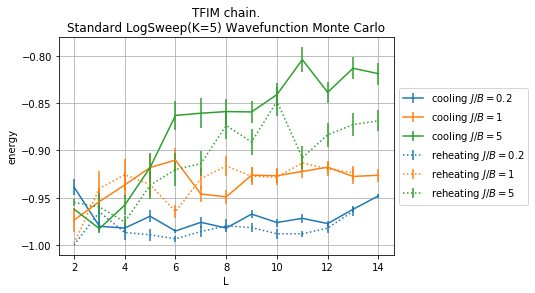

In [5]:
K=5
plt.title(f'TFIM chain.\nStandard LogSweep(K={K}) Wavefunction Monte Carlo')

# cooling
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'], 
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples']))
                     ) for d in cooling_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    plt.errorbar(L_l, avgs, yerr=stds, label=f'cooling $J/B={JvB}$')
    
# reheating
plt.gca().set_prop_cycle(None)
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'],  
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples'])) 
                     ) for d in reheating_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    plt.errorbar(L_l, avgs, yerr=stds, fmt=':', label=f'reheating $J/B={JvB}$')
    
plt.legend(bbox_to_anchor=(1, .5), loc='center left')
plt.xlabel('L')
plt.ylabel('energy')

## ground space infidelity 

Text(0, 0.5, 'ground space infidelity')

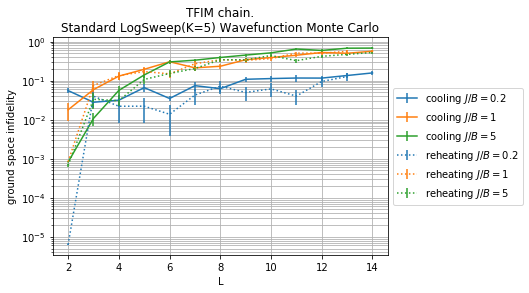

In [6]:
K=5
plt.title(f'TFIM chain.\nStandard LogSweep(K={K}) Wavefunction Monte Carlo')

# cooling
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'], 
                      d['gsf_avg'], 
                      d['gsf_std']/np.sqrt(len(d['gsf_samples']))
                     ) for d in cooling_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    plt.errorbar(L_l, 1-np.array(avgs), yerr=stds, label=f'cooling $J/B={JvB}$')
    
# reheating
plt.gca().set_prop_cycle(None)
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'],  
                      d['gsf_avg'], 
                      d['gsf_std']/np.sqrt(len(d['gsf_samples'])) 
                     ) for d in reheating_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    plt.errorbar(L_l, 1-np.array(avgs), yerr=stds, fmt=':', label=f'reheating $J/B={JvB}$')
    
plt.legend(bbox_to_anchor=(1, .5), loc='center left')
plt.yscale('log')
plt.xlabel('L')
plt.ylabel('ground space infidelity')